# Decision Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
pd.set_option('display.max_columns', None)

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
dtypes = {'YEAR': np.int16, 'MONTH': np.int16, 'DAY_OF_MONTH': np.int16, 'DAY_OF_WEEK': np.int16,
'FL_NUM': np.int16, 'ORIGIN_AIRPORT_ID': np.int16, 'DEST_AIRPORT_ID': np.int16, 'CRS_DEP_TIME': np.int16, 
'DEP_TIME':np.float16, 'DEP_DELAY':np.float16, 'DEP_DELAY_NEW':np.float16, 'DEP_DEL15':np.float16,
'DEP_DELAY_GROUP': np.float16, 'TAXI_OUT':np.float16, 'WHEELS_OFF':np.float16, 'WHEELS_ON':np.float16,
'TAXI_IN':np.float16, 'CRS_ARR_TIME':np.int16, 'ARR_TIME':np.float16, 'ARR_DELAY':np.float16, 
'ARR_DELAY_NEW':np.float16, 'ARR_DEL15':np.float16, 'ARR_DELAY_GROUP':np.float16, 'CANCELLED':np.float16, 
'DIVERTED':np.float16, 'CRS_ELAPSED_TIME':np.float16, 'ACTUAL_ELAPSED_TIME':np.float16, 'AIR_TIME':np.float16,
'FLIGHTS':np.float16, 'DISTANCE':np.float16, 'DISTANCE_GROUP':np.int16, 'CARRIER_DELAY':np.float16, 
'WEATHER_DELAY':np.float16, 'NAS_DELAY':np.float16, 'SECURITY_DELAY':np.float16, 'LATE_AIRCRAFT_DELAY':np.float16
}
parse_dates = ['FL_DATE', ]

In [ ]:
data = pd.read_csv("../airOT201201.csv", dtype = dtypes, parse_dates=parse_dates)

In [4]:
data['FL_DATE'] = pd.to_datetime(data['FL_DATE'], format="%Y-%m-%d")

In [5]:
start_date_str = '2012-01-10'
end_date_str = '2012-01-22'

start_date = pd.to_datetime(start_date_str, format="%Y-%m-%d")
end_date = pd.to_datetime(end_date_str, format="%Y-%m-%d")

In [6]:
train_data = data.loc[(data['FL_DATE']>=start_date) & (data['FL_DATE']<=end_date)].copy()

In [7]:
# data["DEP_HOUR"] = data["DEP_TIME"] // 100
# data["ARR_HOUR"] = data["ARR_TIME"] // 100

train_data["DEP_HOUR"] = train_data["CRS_DEP_TIME"] // 100
train_data["ARR_HOUR"] = train_data["CRS_ARR_TIME"] // 100

In [8]:
train_data = train_data[["DAY_OF_WEEK", "DEP_HOUR", "ARR_HOUR", "UNIQUE_CARRIER", "ORIGIN", "DEST", "DISTANCE", "ARR_DEL15"]]
train_data = train_data.dropna()

In [9]:
day_map = {1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat", 7: "Sun"}
hour_map = {1: "1TO3", 2: "1TO3", 3: "1TO3",
            4: "4TO6", 5: "4TO6", 6: "4TO6",
            7: "7TO9", 8: "7TO9", 9: "7TO9",
            10: "10TO12", 11: "10TO12", 12: "10TO12",
            13: "13TO15", 14: "13TO15", 15: "13TO15",
            16: "16TO18", 17: "16TO18", 18: "16TO18",
            19: "19TO21", 20: "19TO21", 21: "19TO21",
            22: "22TO0", 23: "22TO0", 24: "22TO0", 0: "22TO0"}
train_data = train_data.replace({'DAY_OF_WEEK': day_map, 'DEP_HOUR': hour_map, 'ARR_HOUR': hour_map})

In [10]:
train_data_enc = pd.get_dummies(train_data)
train_data_enc.head()

,DISTANCE,ARR_DEL15,DAY_OF_WEEK_Fri,DAY_OF_WEEK_Mon,DAY_OF_WEEK_Sat,DAY_OF_WEEK_Sun,DAY_OF_WEEK_Thu,DAY_OF_WEEK_Tue,DAY_OF_WEEK_Wed,DEP_HOUR_10TO12,DEP_HOUR_13TO15,DEP_HOUR_16TO18,DEP_HOUR_19TO21,DEP_HOUR_1TO3,DEP_HOUR_22TO0,DEP_HOUR_4TO6,DEP_HOUR_7TO9,ARR_HOUR_10TO12,ARR_HOUR_13TO15,ARR_HOUR_16TO18,ARR_HOUR_19TO21,ARR_HOUR_1TO3,ARR_HOUR_22TO0,ARR_HOUR_4TO6,ARR_HOUR_7TO9,UNIQUE_CARRIER_AA,UNIQUE_CARRIER_AS,UNIQUE_CARRIER_B6,UNIQUE_CARRIER_DL,UNIQUE_CARRIER_EV,UNIQUE_CARRIER_F9,UNIQUE_CARRIER_FL,UNIQUE_CARRIER_HA,UNIQUE_CARRIER_MQ,UNIQUE_CARRIER_OO,UNIQUE_CARRIER_UA,UNIQUE_CARRIER_US,UNIQUE_CARRIER_VX,UNIQUE_CARRIER_WN,UNIQUE_CARRIER_YV,ORIGIN_ABE,ORIGIN_ABI,ORIGIN_ABQ,ORIGIN_ABY,ORIGIN_ACV,ORIGIN_ADK,ORIGIN_ADQ,ORIGIN_AEX,ORIGIN_AGS,ORIGIN_ALB,ORIGIN_AMA,ORIGIN_ANC,ORIGIN_ART,ORIGIN_ASE,ORIGIN_ATL,ORIGIN_ATW,ORIGIN_AUS,ORIGIN_AVL,ORIGIN_AVP,ORIGIN_AZO,ORIGIN_BDL,ORIGIN_BET,ORIGIN_BFL,ORIGIN_BGR,ORIGIN_BHM,ORIGIN_BIL,ORIGIN_BIS,ORIGIN_BKG,ORIGIN_BLI,ORIGIN_BMI,ORIGIN_BNA,ORIGIN_BOI,ORIGIN_BOS,ORIGIN_BQK,ORIGIN_BQN,ORIGIN_BRO,ORIGIN_BRW,ORIGIN_BTM,ORIGIN_BTR,ORIGIN_BTV,ORIGIN_BUF,ORIGIN_BUR,ORIGIN_BWI,ORIGIN_BZN,ORIGIN_CAE,ORIGIN_CAK,ORIGIN_CDC,ORIGIN_CDV,ORIGIN_CEC,ORIGIN_CHA,ORIGIN_CHO,ORIGIN_CHS,ORIGIN_CIC,ORIGIN_CID,ORIGIN_CLD,ORIGIN_CLE,ORIGIN_CLT,ORIGIN_CMH,ORIGIN_CMI,ORIGIN_CMX,ORIGIN_COD,ORIGIN_COS,ORIGIN_CPR,ORIGIN_CRP,ORIGIN_CRW,ORIGIN_CSG,ORIGIN_CVG,ORIGIN_CWA,ORIGIN_CYS,ORIGIN_DAB,ORIGIN_DAL,ORIGIN_DAY,ORIGIN_DBQ,ORIGIN_DCA,ORIGIN_DEN,ORIGIN_DFW,ORIGIN_DHN,ORIGIN_DLH,ORIGIN_DRO,ORIGIN_DSM,ORIGIN_DTW,ORIGIN_EAU,ORIGIN_ECP,ORIGIN_EGE,ORIGIN_EKO,ORIGIN_ELM,ORIGIN_ELP,ORIGIN_EUG,ORIGIN_EVV,ORIGIN_EWN,ORIGIN_EWR,ORIGIN_EYW,ORIGIN_FAI,ORIGIN_FAR,ORIGIN_FAT,ORIGIN_FAY,ORIGIN_FCA,ORIGIN_FLG,ORIGIN_FLL,ORIGIN_FNT,ORIGIN_FSD,ORIGIN_FSM,ORIGIN_FWA,ORIGIN_GCC,ORIGIN_GEG,ORIGIN_GFK,ORIGIN_GJT,ORIGIN_GNV,ORIGIN_GPT,ORIGIN_GRB,ORIGIN_GRI,ORIGIN_GRK,ORIGIN_GRR,ORIGIN_GSO,ORIGIN_GSP,ORIGIN_GTF,ORIGIN_GTR,ORIGIN_GUC,ORIGIN_GUM,ORIGIN_HDN,ORIGIN_HLN,ORIGIN_HNL,ORIGIN_HOB,ORIGIN_HOU,ORIGIN_HPN,ORIGIN_HRL,ORIGIN_HSV,ORIGIN_IAD,ORIGIN_IAH,ORIGIN_ICT,ORIGIN_IDA,ORIGIN_ILM,ORIGIN_IND,ORIGIN_IPL,ORIGIN_ISP,ORIGIN_ITO,ORIGIN_IYK,ORIGIN_JAC,ORIGIN_JAN,ORIGIN_JAX,ORIGIN_JFK,ORIGIN_JNU,ORIGIN_KOA,ORIGIN_KTN,ORIGIN_LAN,ORIGIN_LAS,ORIGIN_LAX,ORIGIN_LBB,ORIGIN_LCH,ORIGIN_LEX,ORIGIN_LFT,ORIGIN_LGA,ORIGIN_LGB,ORIGIN_LIH,ORIGIN_LIT,ORIGIN_LMT,ORIGIN_LNK,ORIGIN_LRD,ORIGIN_LSE,ORIGIN_LWB,ORIGIN_LWS,ORIGIN_MAF,ORIGIN_MBS,ORIGIN_MCI,ORIGIN_MCO,ORIGIN_MDT,ORIGIN_MDW,ORIGIN_MEI,ORIGIN_MEM,ORIGIN_MFE,ORIGIN_MFR,ORIGIN_MGM,ORIGIN_MHK,ORIGIN_MHT,ORIGIN_MIA,ORIGIN_MKE,ORIGIN_MKG,ORIGIN_MLB,ORIGIN_MLI,ORIGIN_MLU,ORIGIN_MMH,ORIGIN_MOB,ORIGIN_MOD,ORIGIN_MOT,ORIGIN_MQT,ORIGIN_MRY,ORIGIN_MSN,ORIGIN_MSO,ORIGIN_MSP,ORIGIN_MSY,ORIGIN_MTJ,ORIGIN_MYR,ORIGIN_OAJ,ORIGIN_OAK,ORIGIN_OGG,ORIGIN_OKC,ORIGIN_OMA,ORIGIN_OME,ORIGIN_ONT,ORIGIN_ORD,ORIGIN_ORF,ORIGIN_OTH,ORIGIN_OTZ,ORIGIN_PAH,ORIGIN_PBI,ORIGIN_PDX,ORIGIN_PHF,ORIGIN_PHL,ORIGIN_PHX,ORIGIN_PIA,ORIGIN_PIH,ORIGIN_PIT,ORIGIN_PNS,ORIGIN_PSC,ORIGIN_PSE,ORIGIN_PSG,ORIGIN_PSP,ORIGIN_PVD,ORIGIN_PWM,ORIGIN_RAP,ORIGIN_RDD,ORIGIN_RDM,ORIGIN_RDU,ORIGIN_RFD,ORIGIN_RIC,ORIGIN_RKS,ORIGIN_RNO,ORIGIN_ROA,ORIGIN_ROC,ORIGIN_ROW,ORIGIN_RST,ORIGIN_RSW,ORIGIN_SAF,ORIGIN_SAN,ORIGIN_SAT,ORIGIN_SAV,ORIGIN_SBA,ORIGIN_SBN,ORIGIN_SBP,ORIGIN_SCC,ORIGIN_SDF,ORIGIN_SEA,ORIGIN_SFO,ORIGIN_SGF,ORIGIN_SGU,ORIGIN_SHV,ORIGIN_SIT,ORIGIN_SJC,ORIGIN_SJU,ORIGIN_SLC,ORIGIN_SMF,ORIGIN_SMX,ORIGIN_SNA,ORIGIN_SPI,ORIGIN_SRQ,ORIGIN_STL,ORIGIN_STT,ORIGIN_STX,ORIGIN_SUN,ORIGIN_SUX,ORIGIN_SWF,ORIGIN_SYR,ORIGIN_TLH,ORIGIN_TOL,ORIGIN_TPA,ORIGIN_TRI,ORIGIN_TUL,ORIGIN_TUS,ORIGIN_TVC,ORIGIN_TWF,ORIGIN_TXK,ORIGIN_TYR,ORIGIN_TYS,ORIGIN_VLD,ORIGIN_VPS,ORIGIN_WRG,ORIGIN_XNA,ORIGIN_YAK,ORIGIN_YUM,DEST_ABE,DEST_ABI,DEST_ABQ,DEST_ABY,DEST_ACV,DEST_ADK,DEST_ADQ,DEST_AEX,DEST_AGS,DEST_ALB,DEST_AMA,DEST_ANC,DEST_ART,DEST_ASE,DEST_ATL,DEST_ATW,DEST_AUS,DEST_AVL,DEST_AVP,DEST_AZO,DEST_BDL,DEST_BET,DEST_BFL,DEST_BGR,DEST_BHM,DEST_BIL,DEST_BIS,DEST_BKG,DEST_BLI,DEST_BMI,DEST_BNA,DEST_BOI

In [11]:
# No splitting into training set and test set in this case

X_train = train_data_enc.copy()
y_train = X_train.pop("ARR_DEL15")

In [12]:
predictors = list(X_train.columns.values)

In [13]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for training dataset
y_pred = clf.predict(X_train)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 0.8284671903740816


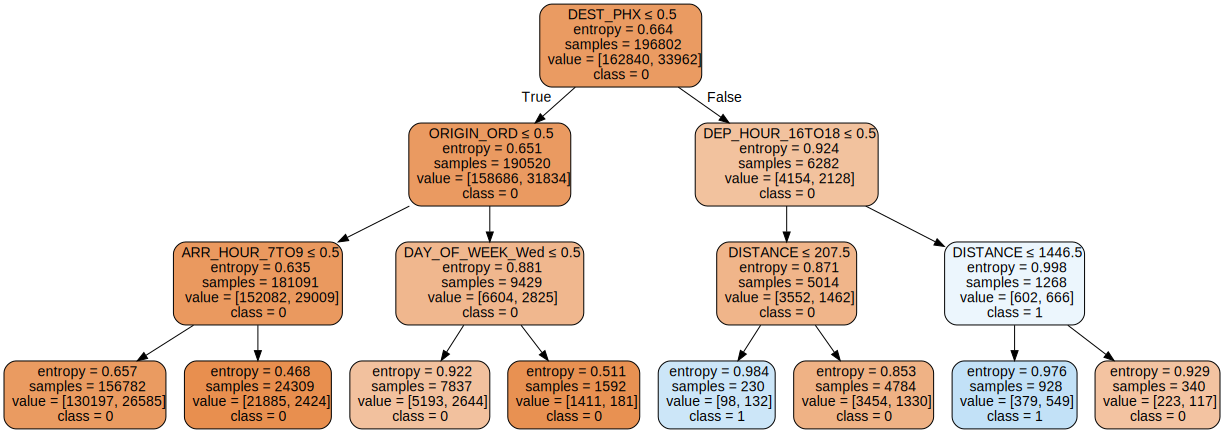

In [14]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf,
                           filled=True, 
                           rounded=True,
                           special_characters=True, 
                           feature_names = predictors,
                           class_names=['0','1'])
graph = graphviz.Source(dot_data)
display(graph)

# Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rf = RandomForestClassifier(n_estimators=round(len(predictors)), criterion="entropy", max_depth = 3)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_train)

print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 0.827430615542525


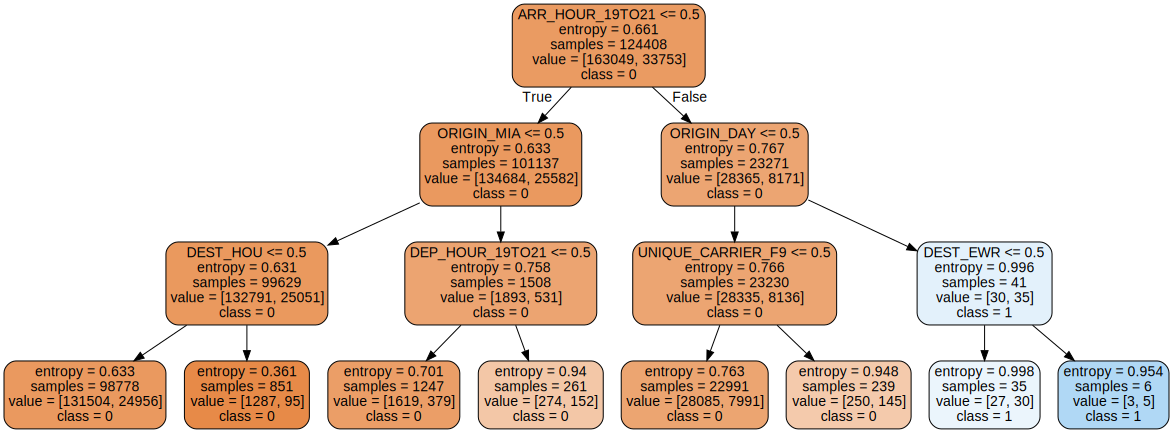

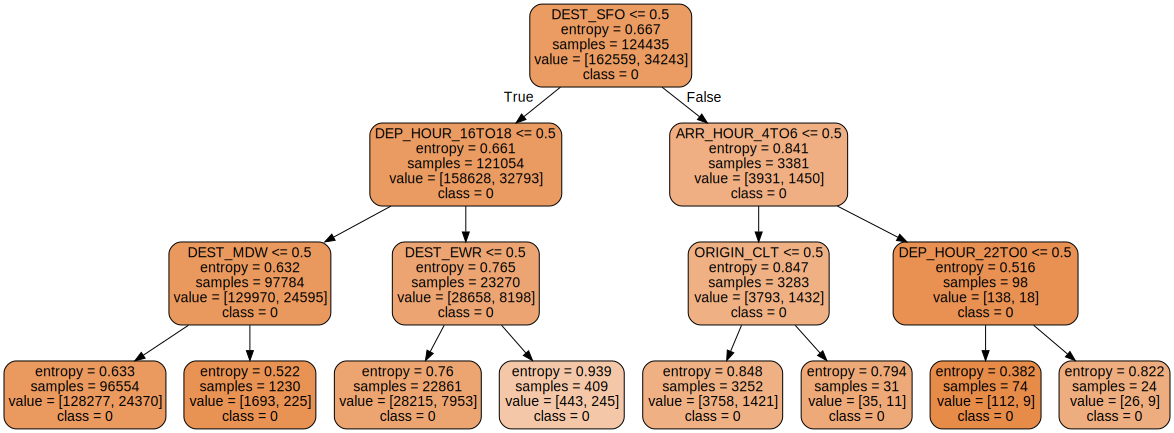

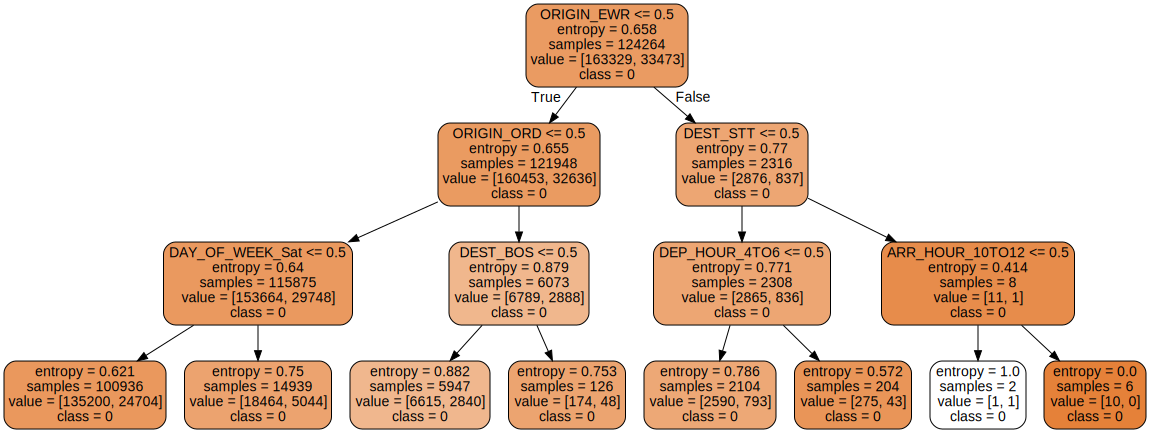

In [17]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=predictors,  
                               filled=True,  
                               rounded=True,
                               max_depth=3,
                               class_names=['0','1'])
    graph = graphviz.Source(dot_data)
    display(graph)

['DEST_PHX',
 'ORIGIN_ORD',
 'ARR_HOUR_19TO21',
 'DEP_HOUR_16TO18',
 'ARR_HOUR_7TO9',
 'DEP_HOUR_4TO6',
 'DAY_OF_WEEK_Sat',
 'DEP_HOUR_7TO9',
 'UNIQUE_CARRIER_WN',
 'DAY_OF_WEEK_Tue',
 'DEST_SFO',
 'DEP_HOUR_19TO21',
 'DAY_OF_WEEK_Wed',
 'ARR_HOUR_10TO12',
 'UNIQUE_CARRIER_F9',
 'DAY_OF_WEEK_Fri',
 'UNIQUE_CARRIER_HA',
 'DAY_OF_WEEK_Mon',
 'DEST_ORD',
 'UNIQUE_CARRIER_EV',
 'DEST_DFW',
 'DEST_IAH',
 'DISTANCE',
 'ORIGIN_SEA',
 'UNIQUE_CARRIER_AS',
 'ARR_HOUR_16TO18',
 'ORIGIN_TPA',
 'ARR_HOUR_22TO0',
 'DEST_EWR',
 'DEST_HOU']

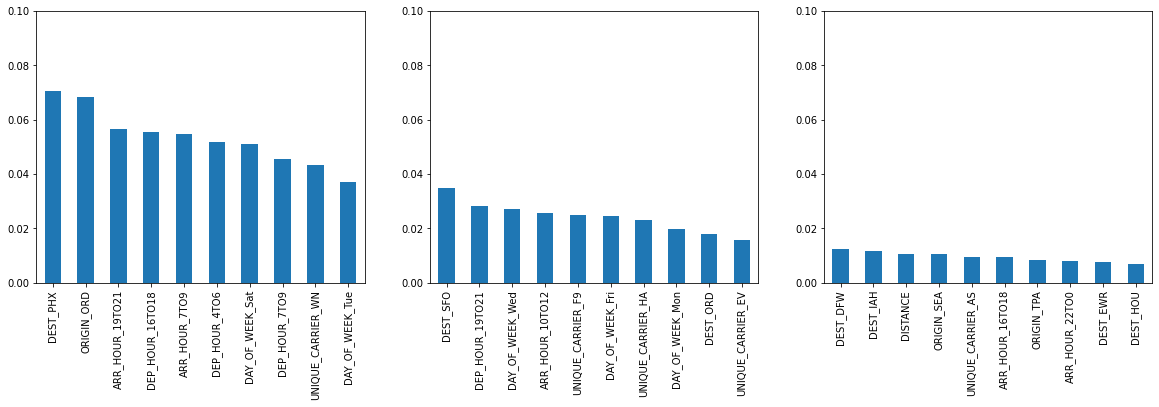

In [18]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
# feature_importances[:10].plot.bar();
plt.figure(figsize=(20,5))

for i in range(3):
  plt.subplot(1,3,i+1)
  feature_importances[10*i:10*(i+1)].plot.bar(ylim=(0,0.1))

list(feature_importances[:30].index)